In [1]:
import librosa
import librosa.display
import numpy as np
import os
import statistics 
from tqdm.notebook import tqdm

In [2]:
def batch(iterable, n):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]
def normal(stat, feature_matrix):
    return np.nan_to_num((feature_matrix - stat['mean']) / stat['std'])
def normal2(matrix):
    aux  = matrix.T
    print("Normalizing...")
    for idx in batch(np.arange(aux.shape[0]), 1000):
        aux[idx, :] = normal(stat , aux[idx, :])
    return aux

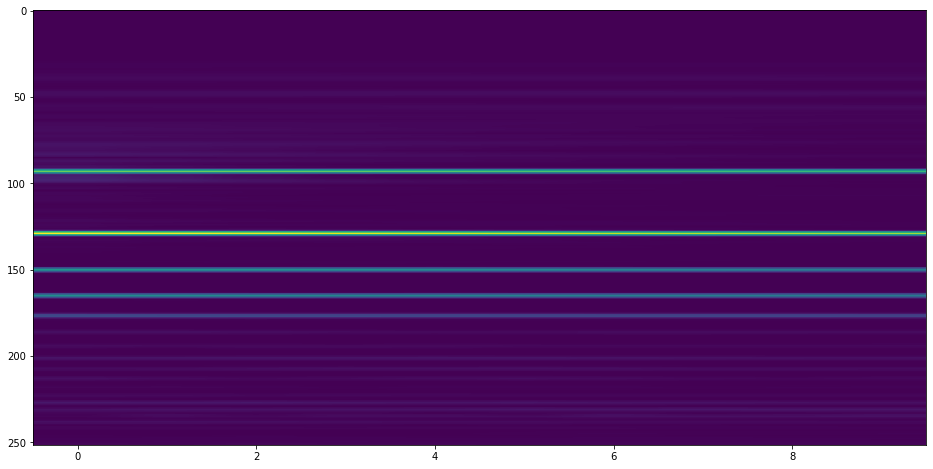

In [5]:
import matplotlib.pyplot as plt
aux,sr = librosa.core.load('Data train/MAPS_ISOL_NO_F_S0_M55_AkPnBcht.wav',sr=44100, mono=True)
X= np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))
plt.figure(figsize=(16, 8))
plt.imshow(X[:,50:60], aspect="auto")

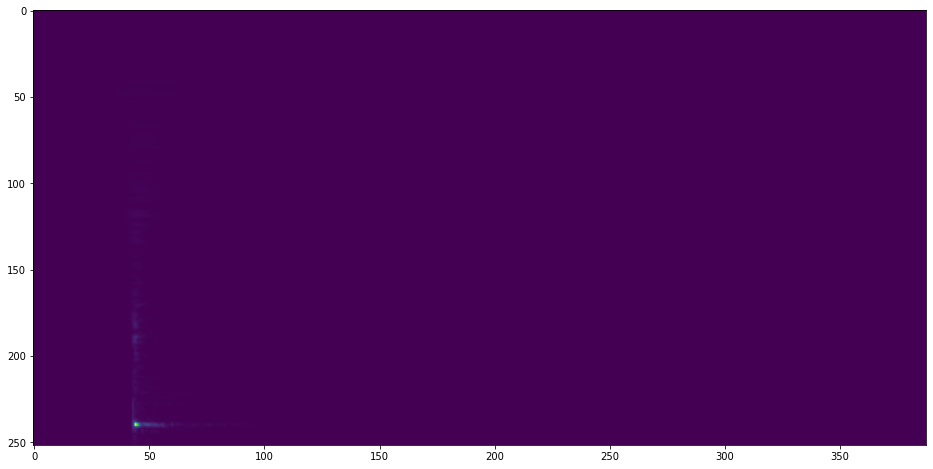

In [9]:
import matplotlib.pyplot as plt
aux,sr = librosa.core.load('Data train/'+lis[1].replace('.txt','.wav'),sr=44100, mono=True)
X= np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))
plt.figure(figsize=(16, 8))
plt.imshow(X, aspect="auto")

In [3]:
rut = 'C:/Users/Emmanuel Salazar/Desktop/maestria/3er Semestre/Temas Selectos de Ciencia de Datos/proyecto/Lineal/'

In [4]:
l = os.listdir(rut+'Data train')

In [5]:
lis=[]
for arch in l:
    if arch.endswith('.txt'):
        lis.append(arch)

In [6]:
#Se lee el primer archivo txt
sr=44100
f=open(rut + 'Data train/'+lis[0],'r') 
L=f.readlines()
f.close()
#Se guarda el segundo en donde inicia y termina la nota 
inicio=librosa.time_to_frames(float(L[1].split()[0]), sr=sr)
fin = 0
for i in L[1:]:
    if fin < float(i.split()[1]):
        fin = float(i.split()[1])
fin=librosa.time_to_frames(fin, sr=sr)
#Se genera una matriz con la longitud de las notas de un piano estandar
y=np.zeros((fin-inicio,88))

for i in range(1,len(L)):
    k, j, p = float(L[i].split()[0]), float(L[i].split()[1]), int(L[i].split()[2])
    k, j, p = librosa.time_to_frames(k, sr=sr), librosa.time_to_frames(j, sr=sr), p-21
    y[(k-inicio):(j-inicio),p] = 1

#Se abre el archivo de audio 
aux,sr = librosa.core.load(rut +'Data train/'+lis[0].replace('.txt','.wav'),sr=sr, mono=True)
X_test = np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))
X_test=X_test.T
#Se guarda el primer medio segundo
x=X_test[inicio:fin]

In [7]:
#Se guarda todos los audios
for mus in tqdm(range(1,len(lis))):
    f=open(rut + 'Data train/'+lis[mus],'r') 
    L=f.readlines()
    f.close()
    #Se guarda el segundo en donde inicia y termina la nota 
    inicio=librosa.time_to_frames(float(L[1].split()[0]), sr=sr)
    fin = 0
    for i in L[1:]:
        if fin < float(i.split()[1]):
            fin = float(i.split()[1])
    fin=librosa.time_to_frames(fin, sr=sr)
    #Se genera una matriz con la longitud de las notas de un piano estandar
    y2=np.zeros((fin-inicio,88))

    for i in range(1,len(L)):
        k, j, p = float(L[i].split()[0]), float(L[i].split()[1]), int(L[i].split()[2])
        k, j, p = librosa.time_to_frames(k, sr=sr), librosa.time_to_frames(j, sr=sr), p-21
        y2[(k-inicio):(j-inicio),p] = 1
    y = np.concatenate((y,y2))
    aux,sr = librosa.core.load(rut + 'Data train/'+lis[mus].replace('.txt','.wav'),sr=44100, mono=True)
    X_test = np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))
    X_test=X_test.T
    x2=X_test[inicio:fin]
    x = np.concatenate((x,x2))

  0%|          | 0/15479 [00:00<?, ?it/s]

c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=869
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=704
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=703
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=737
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input

c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=867
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=998
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=875
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=1008
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for inpu

c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=1021
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=934
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=980
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=1018
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for inp

c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=999
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=919
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=838
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=953
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input

c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=812
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=808
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=925
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=935
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input

c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=943
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=823
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=883
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=856
  return f(*args, **kwargs)
c:\users\emmanuel salazar\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input

In [8]:
rut = 'C:/Users/Emmanuel Salazar/Desktop/maestria/3er Semestre/Temas Selectos de Ciencia de Datos/proyecto/Conv/'

In [9]:
l = os.listdir(rut + 'Test')

In [10]:
lis=[]
for arch in l:
    if arch.endswith('.txt'):
        lis.append(arch)

In [11]:
#Se lee el primer archivo txt
sr=44100
f=open(rut + 'Test/'+lis[0],'r') 
L=f.readlines()
f.close()
#Se guarda el segundo en donde inicia y termina la nota 
inicio=librosa.time_to_frames(float(L[1].split()[0]), sr=sr)
fin = 0
for i in L[1:]:
    if fin < float(i.split()[1]):
        fin = float(i.split()[1])
fin=librosa.time_to_frames(fin, sr=sr)
#Se genera una matriz con la longitud de las notas de un piano estandar
y_test=np.zeros((fin-inicio,88))

for i in range(1,len(L)):
    k, j, p = float(L[i].split()[0]), float(L[i].split()[1]), int(L[i].split()[2])
    k, j, p = librosa.time_to_frames(k, sr=sr), librosa.time_to_frames(j, sr=sr), p-21
    y_test[(k-inicio):(j-inicio),p] = 1

#Se abre el archivo de audio 
aux,sr = librosa.core.load(rut +'Test/'+lis[0].replace('.txt','.wav'),sr=sr, mono=True)
X_test = np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))
X_test=X_test.T
#Se guarda el primer medio segundo
X_test=X_test[inicio:fin]

In [12]:
#Se guarda todos los audios
for mus in tqdm(range(1,len(lis))):
    f=open(rut + 'Test/'+lis[mus],'r') 
    L=f.readlines()
    f.close()
    #Se guarda el segundo en donde inicia y termina la nota 
    inicio=librosa.time_to_frames(float(L[1].split()[0]), sr=sr)
    fin = 0
    for i in L[1:]:
        if fin < float(i.split()[1]):
            fin = float(i.split()[1])
    fin=librosa.time_to_frames(fin, sr=sr)
    #Se genera una matriz con la longitud de las notas de un piano estandar
    y2=np.zeros((fin-inicio,88))

    for i in range(1,len(L)):
        k, j, p = float(L[i].split()[0]), float(L[i].split()[1]), int(L[i].split()[2])
        k, j, p = librosa.time_to_frames(k, sr=sr), librosa.time_to_frames(j, sr=sr), p-21
        y2[(k-inicio):(j-inicio),p] = 1
    y_test = np.concatenate((y_test,y2))
    aux,sr = librosa.core.load(rut + 'Test/'+lis[mus].replace('.txt','.wav'),sr=44100, mono=True)
    x2 = np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))
    x2=x2.T
    x2=x2[inicio:fin]
    X_test = np.concatenate((X_test,x2))

  0%|          | 0/59 [00:00<?, ?it/s]

In [13]:
#Se abre el archivo de audio 
aux,sr = librosa.core.load('MAPS_MUS-mz_331_3_ENSTDkCl.wav',sr=sr, mono=True)
MusP = np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36)).T

In [14]:
stat = dict()
stat['mean'] =np.mean(x,axis=0)
stat['std'] = np.std(x,axis=0)

In [15]:
x = normal2(x.T)
X_test = normal2(X_test.T)
MusP = normal2(MusP.T)

Normalizing...
Normalizing...
Normalizing...


In [18]:
import numpy as np
np.save('Res Base/x.npy', x)
np.save('Res Base/y.npy', y)
np.save('Res Base/X_test.npy', X_test)
np.save('Res Base/y_test.npy', y_test)
np.save('Res Base/MusP.npy', MusP)
np.save('Res Base/x_mean.npy', stat['mean'])
np.save('Res Base/x_std.npy', stat['std'])